In [74]:
import pandas as pd
import re
import os
import jieba
import jieba.posseg as pseg
import pickle
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [75]:
jieba.set_dictionary('dict.txt.big')
stop_words = open('stop_words.txt').read().splitlines()

In [76]:
data=pd.read_csv('a.csv')

In [77]:
data.head()

,ids,name,start,times,words
0,112766265361446663199,https://www.google.com/maps/contrib/1127662653...,1,1 個月前,說明去過的人都知道，沒去過的人要謹慎?我今天去當冤大頭!!!
1,114322358088477033789,https://www.google.com/maps/contrib/1143223580...,1,3 個月前,今天終於嚐到當“華僑”的滋味，吃過才知道痛，不是普通的貴！炒花枝350、海瓜子250、炸銀魚...
2,100847149509878893874,https://www.google.com/maps/contrib/1008471495...,1,4 個月前,我們帶著一歲小朋友站在門口外，討論要不要吃這間店，男店員過來問我們要點餐嗎？我們回答我們還在...
3,104996948090573053076,https://www.google.com/maps/contrib/1049969480...,1,6 個月前,絕對的黑店！我們點了水缸裏唯一一隻的花蟹，服務員也沒告訴我們它是單鉗，直接蒸出來上菜然後腳也...
4,106519772340329659720,https://www.google.com/maps/contrib/1065197723...,1,4 個月前,太貴了，手藝也不好。點了海鮮炒飯 水晶魚 蛤蜊湯就超過六百，炒飯炒的糊糊的，水晶魚炸的軟軟的...


In [78]:
content=''
for i in data['words']:
    content=content+i

In [79]:
fil = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+', re.UNICODE)
content=fil.sub(' ', content)

In [80]:
content=str(content).replace("!@#$%^&*()[]{};:,./<>?\|`~-=_+", " ")
content=content.replace('\n', '')
content=content.replace('\t', '')
content=content.replace('\u2003', '')
content=re.sub('\W+',' ',content).strip()

In [81]:
word=[]
for w in jieba.cut(content, cut_all=False):
    if w not in stop_words and not bool(re.match('[0-9]+', w)):
        word.append(w) 

Building prefix dict from /root/analytics/crawb/google_comment/dict.txt.big ...
Loading model from cache /tmp/jieba.u26d7d048baf4768f9c5b4eff8a1341bb.cache
Loading model cost 1.735 seconds.
Prefix dict has been built succesfully.


In [82]:
word=pd.DataFrame(word)

In [83]:
count=word.groupby([0]).size().reset_index(name='counts')
ans=count.sort_index(by='counts',ascending=False)

/usr/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [84]:
ans

,0,counts
681,米粉,44
387,小卷,42
779,貴,34
213,價格,22
111,一碗,18
493,新鮮,17
850,難吃,14
369,好吃,13
168,人,12
909,黑店,11


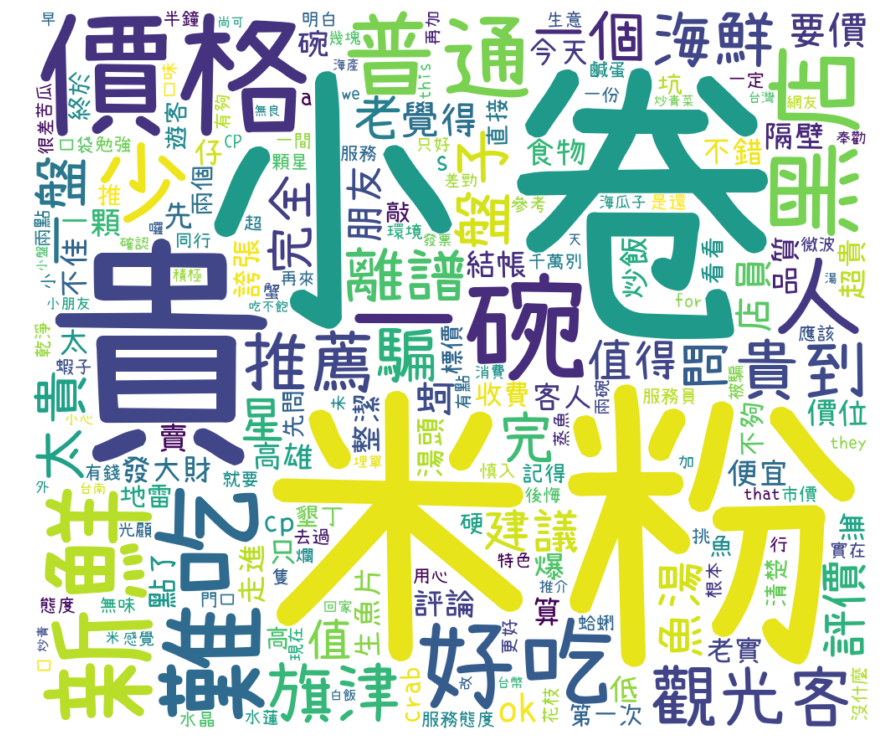

In [85]:
wordcloud = WordCloud(font_path="setofont.ttf",background_color="white",width=1000, height=860, margin=2)  ##做中文時務必加上字形檔
wordcloud.generate_from_frequencies(frequencies=Counter(ans[0]))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('much.png')

In [21]:
from PIL import Image
alice_mask = np.array(Image.open("cloud_mask7.png"))  ## 請更改cloud_mask7.png路徑

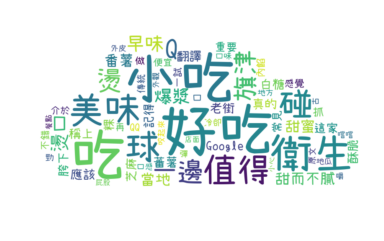

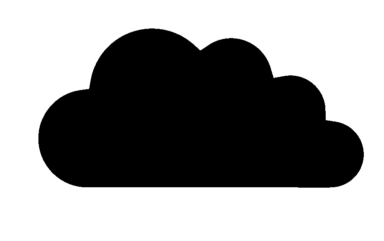

In [22]:
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="setofont.ttf")
wc.generate_from_frequencies(Counter(ans[0]))  ## 請更改Counter(terms)

wc.to_file("fa.cloud.png")  ##如果要存檔，可以使用

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()